In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

F:\programData\conda\env\ChatGLM2-6B\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
F:\programData\conda\env\ChatGLM2-6B\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
F:\programData\conda\env\ChatGLM2-6B\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
def synthetic_data(w,b,num_examples):
    x = torch.normal(0,1,(num_examples,len(w)))
    y = torch.matmul(x,w) + b
    y += torch.normal(0,0.01,y.shape)
    return x,y.reshape((-1,1))
true_w = torch.tensor([2,-3.4])
true_b = 4.2
features,labels = synthetic_data(true_w,true_b,1000)
print("features:",features[0],'\nlabel:',labels[0])

features: tensor([-0.8518, -0.2393]) 
label: tensor([3.3041])


tensor([-2.3934e-01,  3.7650e-01, -9.5275e-01,  9.5337e-01,  8.1836e-01,
         1.9276e-01, -1.5527e+00,  5.1275e-02,  1.2402e-01, -1.6154e-01,
        -1.0003e+00,  9.3544e-01, -3.7557e-01, -5.5270e-03,  1.0370e+00,
        -2.7007e-01,  1.0726e+00, -1.4860e+00,  1.2109e+00, -8.6887e-01,
         1.2345e+00,  4.2222e-03, -1.5598e-01,  1.5587e+00,  6.9050e-01,
         4.2270e-01,  4.7213e-01,  3.2592e-01, -7.2503e-01,  5.1665e-02,
        -1.4735e+00,  8.9114e-01,  1.1658e+00, -9.8179e-01, -4.2217e-02,
        -3.7876e-01,  2.2340e-01, -8.0161e-01, -7.2730e-01, -7.7555e-01,
        -6.2610e-01,  3.8252e-02,  6.0225e-01, -1.2697e+00, -6.4896e-01,
        -7.9541e-01, -1.1985e-01, -7.6441e-01, -3.6641e-02, -1.0589e+00,
         1.4748e+00, -1.6013e+00,  1.8098e-01,  1.4255e+00,  1.4130e+00,
         2.4825e-01,  6.4190e-01, -1.4311e+00, -1.2289e+00, -5.0699e-02,
         9.3080e-01,  1.1969e+00, -1.1430e+00, -5.6460e-01,  7.1242e-01,
        -1.6418e+00,  8.4348e-01, -1.4004e+00,  4.0

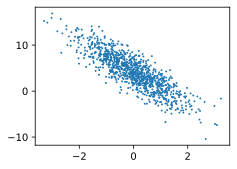

In [3]:
d2l.set_figsize()
d2l.plt.scatter(features[:,(1)].detach().numpy(),labels.detach().numpy(),1)

In [7]:
def data_iter(batch_size,features,labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        batch_indices = torch.tensor(indices[i:min(i+batch_size,num_examples)])
        yield features[batch_indices],labels[batch_indices]
batch_size= 10
for x,y in data_iter(batch_size,features,labels):
    print(x,'\n',y)
    break

tensor([[ 0.8113,  0.0247],
        [-0.6092,  0.8608],
        [-0.0797, -0.9576],
        [ 0.3446, -0.4218],
        [ 0.8880,  1.8926],
        [-0.9922,  0.1770],
        [-1.3164, -0.8032],
        [ 0.6067, -1.1514],
        [-0.2320, -0.3180],
        [ 0.6246,  1.0800]]) 
 tensor([[ 5.7383],
        [ 0.0641],
        [ 7.3104],
        [ 6.3157],
        [-0.4709],
        [ 1.6170],
        [ 4.3183],
        [ 9.3242],
        [ 4.8127],
        [ 1.7860]])


In [ ]:
# 3.2.3 初始化参数模型
w = torch.normal(0,0.01,size=(2,1),requires_grad=True)
b = torch.zeros(1,requires_grad=True)


In [ ]:
# 3.2.4 定义模型
def linreg(x,w,b):
    return torch.matmul(x,w) + b

In [ ]:
# 3.2.5 定义损失函数
def squared_loss(y_hat,y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2/ 2

In [ ]:
# 3.2.6 定义优化算法
def sgd(params,lr,batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [ ]:
# 3.2.7 训练
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for x,y in data_iter(batch_size,features,labels):
        l = loss(net(x,w,b),y)
        l.sum().backward()
        sgd([w,b],lr,batch_size)

    with torch.no_grad():
        train_l = loss(net(features,w,b),labels)
        print(f'epoch {epoch +1},loss {float(train_l.mean()):f}')

In [ ]:
print(f"w的估计误差：{true_w - w.reshape(true_w.shape)}")
print(f"b的估计误差：{true_b}")

In [8]:
# 3.2.3 初始化参数模型
w = torch.normal(0,0.01,size=(2,1),requires_grad=True)
b = torch.zeros(1,requires_grad=True)


In [9]:
# 3.2.4 定义模型
def linreg(x,w,b):
    return torch.matmul(x,w) + b

In [13]:
# 3.2.5 定义损失函数
def squared_loss(y_hat,y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2/ 2

In [15]:
# 3.2.6 定义优化算法
def sgd(params,lr,batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [16]:
# 3.2.7 训练
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for x,y in data_iter(batch_size,features,labels):
        l = loss(net(x,w,b),y)
        l.sum().backward()
        sgd([w,b],lr,batch_size)

    with torch.no_grad():
        train_l = loss(net(features,w,b),labels)
        print(f'epoch {epoch +1},loss {float(train_l.mean()):f}')

epoch 1,loss 0.034334
epoch 2,loss 0.000123
epoch 3,loss 0.000051


In [ ]:
print(f"w的估计误差：{true_w - w.reshape(true_w.shape)}")
print(f"b的估计误差：{true_b}")